In [11]:
# TODO, show how different aggression configurations impact results
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from transpile_benchy.metrics.abc_metrics import MetricInterface
from transpile_benchy.metrics.gate_counts import DepthMetric
from mirror_gates.utilities import DoNothing

In [19]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../circuits/medium_circuits.txt")
library = CircuitLibrary.from_txt("../../circuits/small_circuits.txt")
# library = CircuitLibrary.from_txt("speedups.txt")

In [20]:
library.get_circuit("bv_n4")

ValueError: Circuit 'bv_n4' not found in any interface

In [3]:
# coupling_map = CouplingMap.from_heavy_hex(5)
# transpilers = [
#     QiskitLevel3(coupling_map),
#     SabreMS(coupling_map, name="SABREMS-a0", fixed_aggression=0),
#     SabreMS(coupling_map, name="SABREMS-a1", fixed_aggression=1),
#     SabreMS(coupling_map, name="SABREMS-a2", fixed_aggression=2),
#     SabreMS(coupling_map, name="SABREMS-a3", fixed_aggression=3),
# ]

# metrics = [DepthMetric(consolidate=False)]

In [4]:
coupling_map = CouplingMap.from_heavy_hex(5)

total_work = 80
transpilers = [
    QiskitLevel3(coupling_map),
    SabreMS(coupling_map, name="SABREMS"),
    # SabreMS(coupling_map, name="SABREMS-a0", fixed_aggression=0),
    # SabreMS(coupling_map, name="SABREMS-a1", fixed_aggression=1),
    # SabreMS(coupling_map, name="SABREMS-a2", fixed_aggression=2),
    # SabreMS(coupling_map, name="SABREMS-a3", fixed_aggression=3),
    SabreMS(
        coupling_map,
        name="SABREMS-b0",
        layout_trials=1,
        fb_iters=total_work // 1,
        anneal_routing=True,
    ),
    SabreMS(
        coupling_map,
        name="SABREMS-b1",
        layout_trials=2,
        fb_iters=total_work // 2,
        anneal_routing=True,
    ),
    SabreMS(
        coupling_map,
        name="SABREMS-b2",
        layout_trials=3,
        fb_iters=total_work // 3,
        anneal_routing=True,
    ),
    SabreMS(
        coupling_map,
        name="SABREMS-b3",
        layout_trials=4,
        fb_iters=total_work // 4,
        anneal_routing=True,
    ),
]

metrics = [DepthMetric(consolidate=False)]

In [5]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    num_runs=3,
)
benchmark.run()

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:   0%|          | 0/17 [00:00<?, ?it/s]

Loading dnn_n16 from QASMBench


Circuits from library:   6%|▌         | 1/17 [05:12<1:23:18, 312.43s/it]

Loading cat_state_n22 from QASMBench


Circuits from library:  12%|█▏        | 2/17 [05:18<33:00, 132.04s/it]  

Loading ghz_state_n23 from QASMBench


Circuits from library:  18%|█▊        | 3/17 [05:25<17:30, 75.00s/it] 

Loading bv_n14 from QASMBench


Circuits from library:  24%|██▎       | 4/17 [08:02<23:14, 107.29s/it]

Loading wstate_n27 from MQTBench


Circuits from library:  29%|██▉       | 5/17 [08:14<14:38, 73.20s/it] 

Loading qec9xz_n17 from QASMBench


Circuits from library:  35%|███▌      | 6/17 [12:19<24:04, 131.34s/it]

Loading bv_n19 from QASMBench


Circuits from library:  41%|████      | 7/17 [15:17<24:26, 146.64s/it]

Loading multiply_n13 from QASMBench


Circuits from library:  47%|████▋     | 8/17 [19:05<25:53, 172.56s/it]

Loading seca_n11 from QASMBench


Circuits from library:  53%|█████▎    | 9/17 [24:07<28:25, 213.22s/it]

Loading qram_n20 from QASMBench


Circuits from library:  59%|█████▉    | 10/17 [30:14<30:24, 260.60s/it]

Loading knn_n25 from QASMBench


Circuits from library:  65%|██████▍   | 11/17 [35:49<28:20, 283.34s/it]

Loading swap_test_n25 from QASMBench


Circuits from library:  71%|███████   | 12/17 [41:15<24:41, 296.29s/it]

Loading bigadder_n18 from QASMBench


Circuits from library:  76%|███████▋  | 13/17 [48:42<22:47, 341.94s/it]

Loading qf21_n15 from QASMBench


In [ ]:
print(benchmark.summary_statistics(transpilers[0], transpilers[1])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[2])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[3])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[4])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[5])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[6])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[7])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[8])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[9])["monodromy_depth"])

NameError: name 'benchmark' is not defined

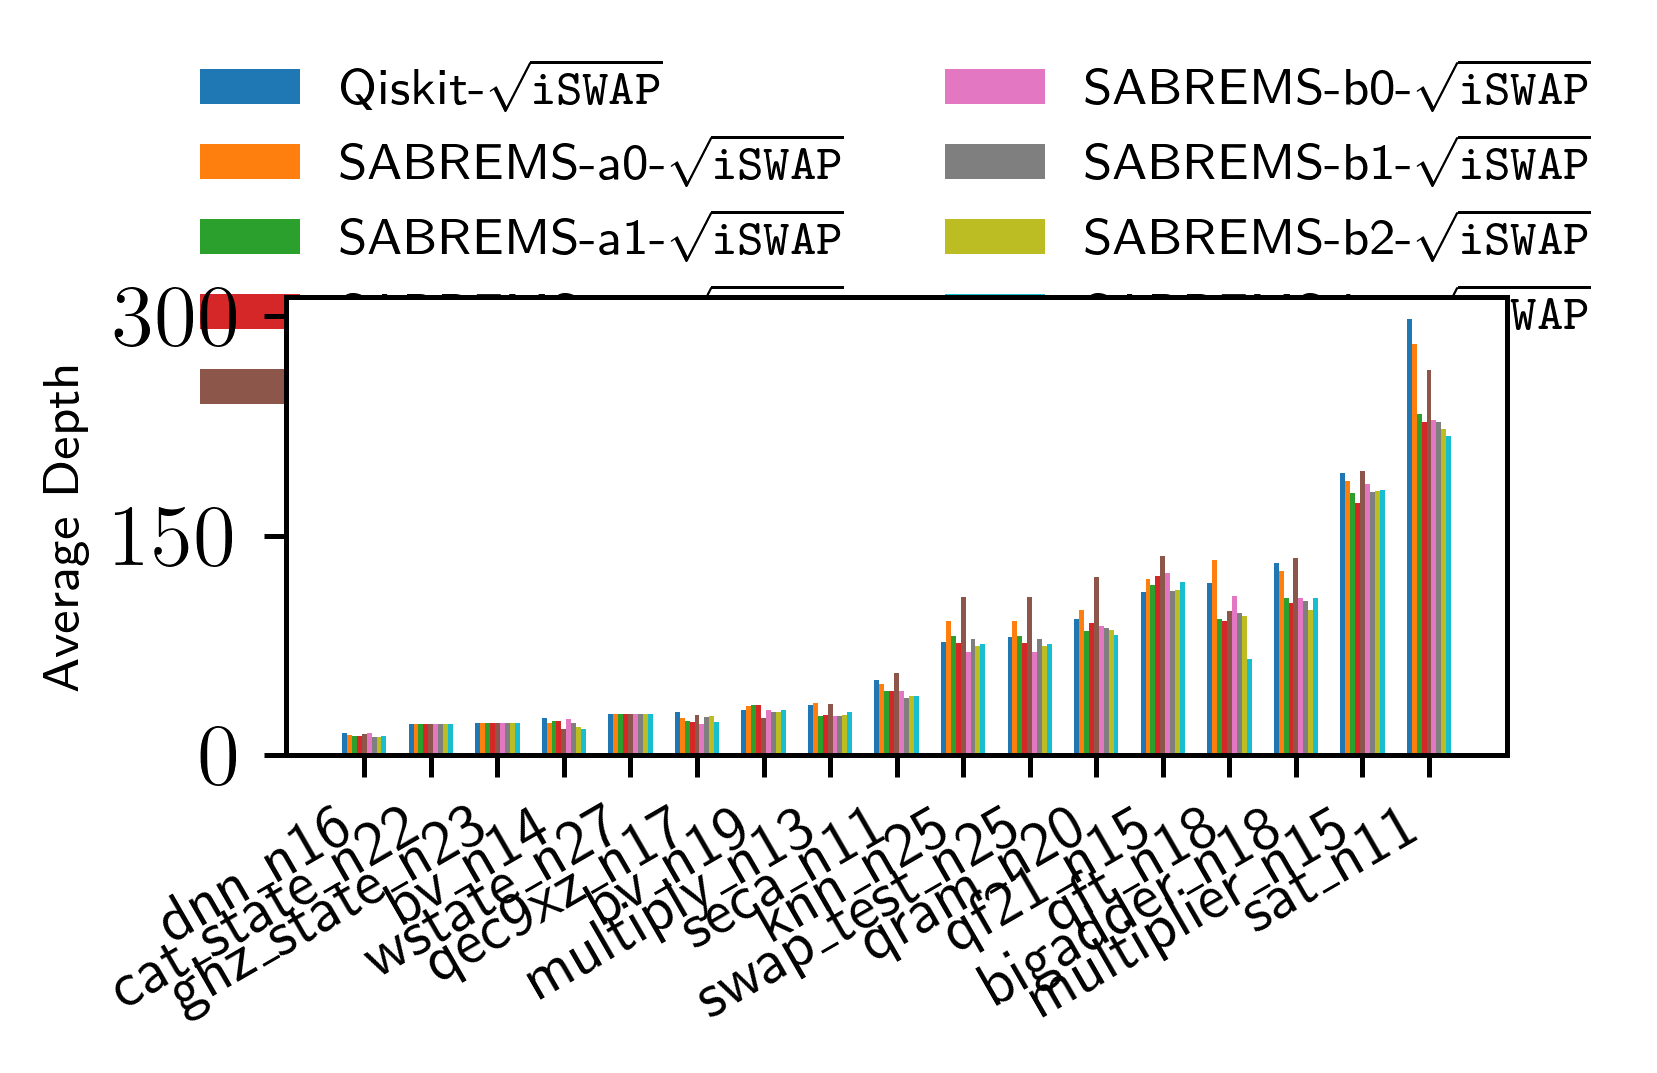

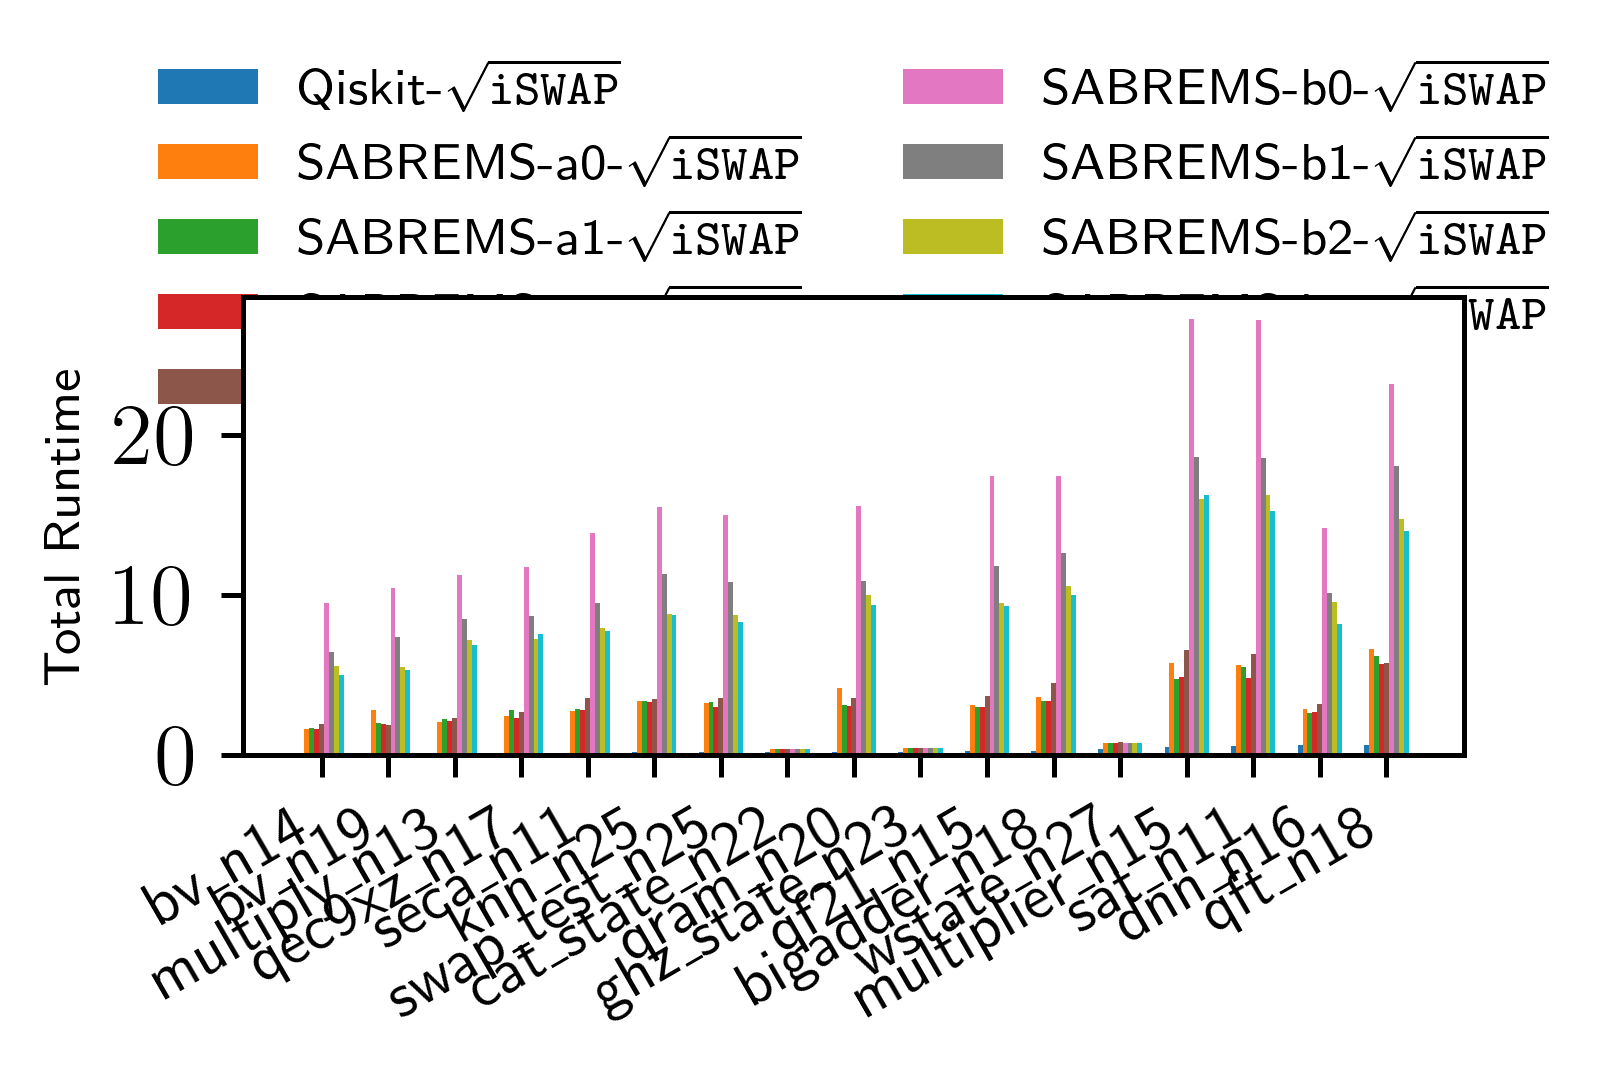

In [ ]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=0, legend_show=1, filename="aggression")